In [2]:
import pandas as pd
import random
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)

# 1. simulate the privacy budget distribution

In [3]:
grouplist=["conservative","moderate","liberal"]
privacy_list=[]
for i in range(100000):
    group=np.random.choice(grouplist,1,p=[0.54,0.37,0.09])[0]
    if group=="conservative":
        privacy=np.random.uniform(0.01,0.2,1)[0]
    elif group=="moderate":
        privacy=np.random.uniform(0.2,1,1)[0]
    else:
        privacy=1
    privacy_list.append(privacy)
    

(array([2.84223816, 2.80809655, 2.81577336, 2.46142794, 0.46060864,
        0.4810128 , 0.46666928, 0.4753562 , 0.44141662, 0.44444694,
        0.47879056, 0.46505311, 0.44626513, 0.47737641, 0.45333588,
        0.48565929, 0.47555822, 0.46525513, 0.45111364, 2.3066796 ]),
 array([0.01000555, 0.05950527, 0.109005  , 0.15850472, 0.20800444,
        0.25750416, 0.30700389, 0.35650361, 0.40600333, 0.45550305,
        0.50500278, 0.5545025 , 0.60400222, 0.65350194, 0.70300167,
        0.75250139, 0.80200111, 0.85150083, 0.90100056, 0.95050028,
        1.        ]),
 <a list of 20 Patch objects>)

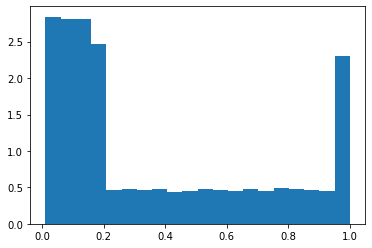

In [4]:
plt.hist(privacy_list,bins=20,density=True)

In [8]:
v1=[]
v2=[]
for i in range(1000):
    group=np.random.choice(grouplist,1,p=[0.54,0.37,0.09])[0]
    if group=="conservative":
        privacy=np.random.uniform(0.1,0.5,1)[0]
    elif group=="moderate":
        privacy=np.random.uniform(0.5,1,1)[0]
    else:
        privacy=1
    v1.append(privacy)

for i in range(1000):
    group=np.random.choice(grouplist,1,p=[1/3,1/3,1/3])[0]
    if group=="conservative":
        privacy=np.random.uniform(0.1,0.5,1)[0]
    elif group=="moderate":
        privacy=np.random.uniform(0.5,1,1)[0]
    else:
        privacy=1
    v2.append(privacy)

In [9]:
priv_list=[]
for i in v1:
    for j in v2:
        priv_list.append(i*j)

(array([1.27933183, 2.09655982, 2.31476205, 1.93106958, 1.65282133,
        1.43787192, 1.3013743 , 1.04775461, 1.06314999, 0.90422602,
        0.59561129, 0.5502333 , 0.5311002 , 0.46157854, 0.4597804 ,
        0.3807629 , 0.41702892, 0.31326164, 0.4076341 , 1.05799799]),
 array([0.01009264, 0.059588  , 0.10908337, 0.15857874, 0.20807411,
        0.25756948, 0.30706485, 0.35656021, 0.40605558, 0.45555095,
        0.50504632, 0.55454169, 0.60403705, 0.65353242, 0.70302779,
        0.75252316, 0.80201853, 0.8515139 , 0.90100926, 0.95050463,
        1.        ]),
 <a list of 20 Patch objects>)

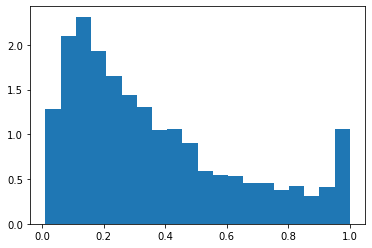

In [10]:
plt.hist(priv_list,bins=20,density=True)

# 2 simulate sampling group by user

In [6]:
import pandas as pd
import numpy as np
np.random.seed(2)
test=pd.DataFrame({'a':[1,2,3,4,5,11,22],'b':[6,7,8,9,10,12,33],'c':['x','z','y','z','x','y','z']})
print(test)

df=test.groupby(test['c']).apply(lambda x:x.sample(frac=0.5))

df


    a   b  c
0   1   6  x
1   2   7  z
2   3   8  y
3   4   9  z
4   5  10  x
5  11  12  y
6  22  33  z


a   b  c
c             
x 4   5  10  x
y 2   3   8  y
z 6  22  33  z
  1   2   7  z

In [7]:
df=df.rename(columns={"c":"rating"})

In [8]:
df=df.reset_index()

,c,level_1,a,b,rating
0,x,4,5,10,x
1,y,2,3,8,y
2,z,6,22,33,z
3,z,1,2,7,z


In [9]:
test=df.groupby("rating").sample(n=1,random_state=1)

In [10]:
test

,,a,b,rating
c,,,,
x,4,5,10,x
y,2,3,8,y
z,6,22,33,z
